In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt

In [8]:
data_path = '/Users/jiangxiaoyu/Desktop/All Projects/Scalable_LVMOGP/data/climate_data/tas_Amon_HadGEM2-A_amip_r1i1p1_197809-200811.nc'
dataset = xr.open_dataset(data_path, decode_times=False)
print(dataset)

tas = dataset['tas']
lat = dataset['lat']
lon = dataset['lon']

tas_torch_ = torch.tensor(tas.values)
lat_torch_ = torch.tensor(lat.values)
lon_torch_ = torch.tensor(lon.values)

subsample_rate = 10
tas_torch = tas_torch_[:, ::subsample_rate, ::subsample_rate] #:60 for time, ::5 for lat and lon
lat_torch = lat_torch_[::subsample_rate]
lon_torch = lon_torch_[::subsample_rate]

assert lat_torch.shape[0] * lon_torch.shape[0] == tas_torch.shape[-1] * tas_torch.shape[-2]
print(tas_torch.shape)

num_outputs = tas_torch.shape[-1] * tas_torch.shape[-2]
print(f'number of outputs: {num_outputs}')

# Three dims: time, latitude, longitude


<xarray.Dataset>
Dimensions:    (time: 363, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) float64 15.0 45.0 75.0 ... 1.082e+04 1.084e+04 1.088e+04
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          amip
    source:                 HadGEM2-A (2009) atmosphere: HadGAM2 (N96L38);  l...
    model_id:               HadGEM2-A
    forcing:                GHG, SA, Oz, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O,...
    ...                     ...
    table_id:               Table A

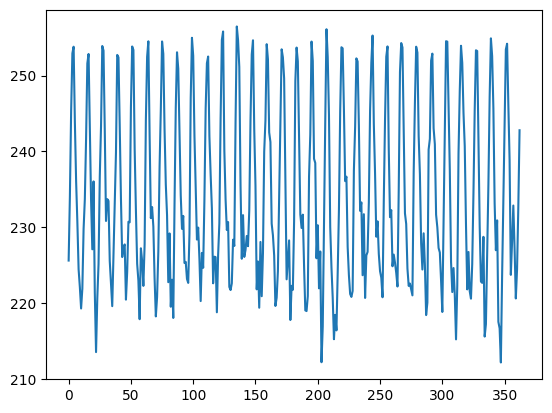

In [12]:
plt.plot(tas_torch_[:, 12, 2])

In [15]:
temperature_path_to_save = f'/Users/jiangxiaoyu/Desktop/All Projects/Scalable_LVMOGP/data/climate_data/tensors_{num_outputs}_outputs/temperature.pt'
torch.save(tas_torch, temperature_path_to_save)

lat_path_to_save = f'/Users/jiangxiaoyu/Desktop/All Projects/Scalable_LVMOGP/data/climate_data/tensors_{num_outputs}_outputs/latitude.pt'
torch.save(lat_torch, lat_path_to_save)

lon_path_to_save = f'/Users/jiangxiaoyu/Desktop/All Projects/Scalable_LVMOGP/data/climate_data/tensors_{num_outputs}_outputs/longitude.pt'
torch.save(lon_torch, lon_path_to_save)